# General Forecasting

In [1]:
import pandas as pd
import numpy as np

In [53]:
import pylab

pylab.rc("figure", figsize=(14, 8))
pylab.rc("font", size=14)

In [2]:
file_name = "/Users/aceituno/Desktop/projects/ws2122/tsa/course-material/Data/airline_passengers.csv"

In [3]:
df = pd.read_csv(file_name, index_col="Month", parse_dates=True)

In [4]:
df.index.freq = "MS"

In [5]:
df.isna().sum()

Thousands of Passengers    0
dtype: int64

In [7]:
df.columns

Index(['Thousands of Passengers'], dtype='object')

In [8]:
df['psg'] = df['Thousands of Passengers']

In [10]:
df.drop('Thousands of Passengers', axis=1, inplace=True)

In [22]:
def describe2(df):
    df_res = df.describe()
    df_res.loc['range'] = df_res.loc['max'] - df_res.loc['min']
    return df_res


describe2(df).T

,count,mean,std,min,25%,50%,75%,max,range
psg,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0,518.0


## Test Train Split

In [114]:
len(df) * 0.8

115.2

In [130]:
# Split the data
train = df.iloc[:115]
test = df.iloc[114:]

In [116]:
# import statsmodels.api as sm

In [118]:
# df.dropna(inplace=True)

In [119]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [77]:
# f_model = ExponentialSmoothing(train.psg, trend='mul',
#                                seasonal_periods=12).fit()

In [139]:
mod = ExponentialSmoothing(train.psg,trend='mul',seasonal='mul',seasonal_periods=12)

In [142]:
f_mod = mod.fit()

In [143]:
f_mod.summary()

Dep. Variable:,psg,No. Observations:,115
Model:,ExponentialSmoothing,SSE,nan
Optimized:,True,AIC,nan
Trend:,Multiplicative,BIC,nan
Seasonal:,Multiplicative,AICC,nan
Seasonal Periods:,12,Date:,"Thu, 03 Mar 2022"
Box-Cox:,False,Time:,19:49:37
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,nan,alpha,True
smoothing_trend,nan,beta,True


<AxesSubplot:xlabel='Month'>

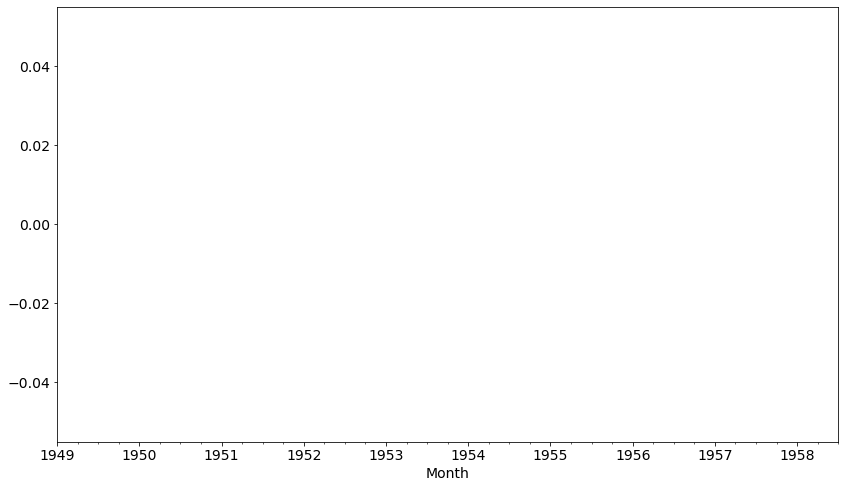

In [144]:
f_mod.fittedvalues.plot()

In [148]:
f_mod.forecast()

1958-08-01   NaN
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

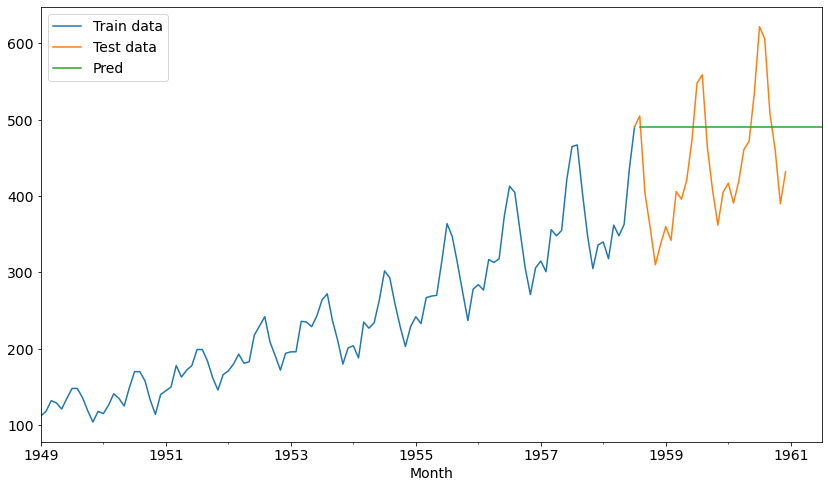

In [128]:
train.psg.plot(legend=True, label="Train data")
test.psg.plot(legend=True, label="Test data")
pred.plot(legend=True, label="Pred")